# Car Price Prediction


In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [2]:
cars = pd.read_csv('data_car.csv')
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
cars.shape

(11914, 16)

In [4]:
cars.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Step 2 : Data Cleaning and Preparation

In [6]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
cars.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

- There seems to be all names in makes are different.

In [8]:
cars.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Step 3: Visualizing the data


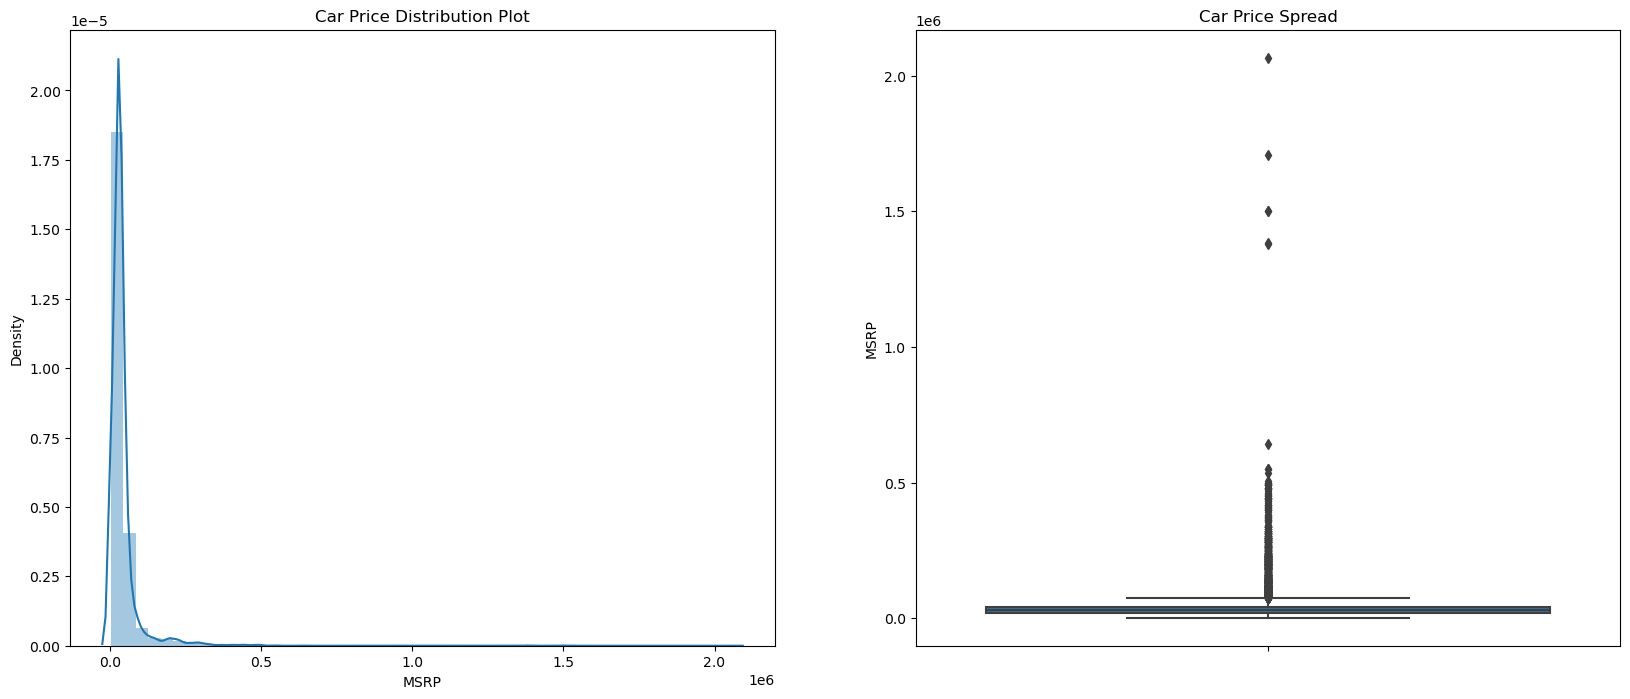

In [9]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.MSRP)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.MSRP)

plt.show()

In [10]:
print(cars.MSRP.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
85%      5.260000e+04
90%      6.508000e+04
100%     2.065902e+06
max      2.065902e+06
Name: MSRP, dtype: float64


#### Inference :

1. The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 42000).
2. There is a significant difference between the mean and the median of the price distribution.
3. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 52000, whereas the remaining 15% are between 52000 and 2000000.)

In [11]:
cars.rename(columns = {'Engine Fuel Type':'Engine_Fuel_Type'}, inplace = True)
cars.rename(columns = {'Vehicle Style':'Vehicle_Style'}, inplace = True)
cars.rename(columns = {'Number of Doors':'Number_of_Doors'}, inplace = True)
cars.rename(columns = {'Engine HP':'Engine_HP'}, inplace = True)
cars.rename(columns = {'highway MPG':'highway_MPG'}, inplace = True)
cars.rename(columns = {'city mpg':'city_mpg'}, inplace = True)
cars.rename(columns = {'Engine Cylinders':'Engine_Cylinders'}, inplace = True)
cars.rename(columns = {'Transmission Type':'Transmission_Type'}, inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chevrolet'),
  Text(1, 0, 'Ford'),
  Text(2, 0, 'Volkswagen'),
  Text(3, 0, 'Toyota'),
  Text(4, 0, 'Dodge'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'GMC'),
  Text(7, 0, 'Honda'),
  Text(8, 0, 'Mazda'),
  Text(9, 0, 'Cadillac')])

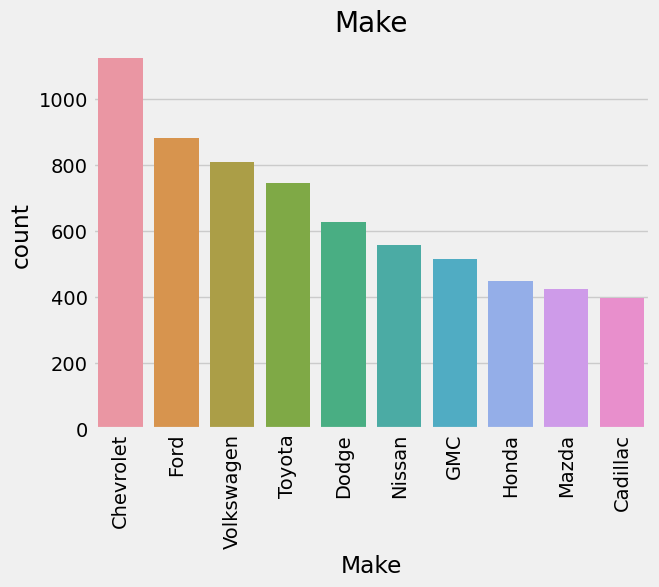

In [12]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Make', data = cars, order = cars.Make.value_counts().iloc[:10].index).set_title('Make')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'regular unleaded'),
  Text(1, 0, 'premium unleaded (required)'),
  Text(2, 0, 'premium unleaded (recommended)'),
  Text(3, 0, 'flex-fuel (unleaded/E85)'),
  Text(4, 0, 'diesel'),
  Text(5, 0, 'electric'),
  Text(6, 0, 'flex-fuel (premium unleaded required/E85)'),
  Text(7, 0, 'flex-fuel (premium unleaded recommended/E85)'),
  Text(8, 0, 'flex-fuel (unleaded/natural gas)'),
  Text(9, 0, 'natural gas')])

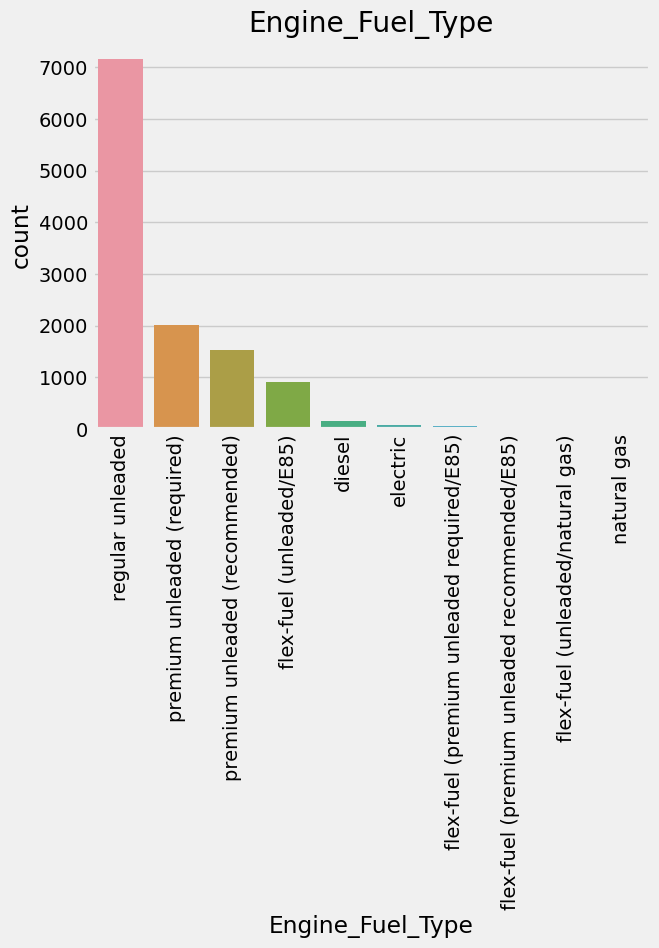

In [13]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Engine_Fuel_Type', data = cars, order = cars.Engine_Fuel_Type.value_counts().iloc[:10].index).set_title('Engine_Fuel_Type')
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sedan'),
  Text(1, 0, '4dr SUV'),
  Text(2, 0, 'Coupe'),
  Text(3, 0, 'Convertible'),
  Text(4, 0, '4dr Hatchback'),
  Text(5, 0, 'Crew Cab Pickup'),
  Text(6, 0, 'Extended Cab Pickup'),
  Text(7, 0, 'Wagon'),
  Text(8, 0, '2dr Hatchback'),
  Text(9, 0, 'Passenger Minivan')])

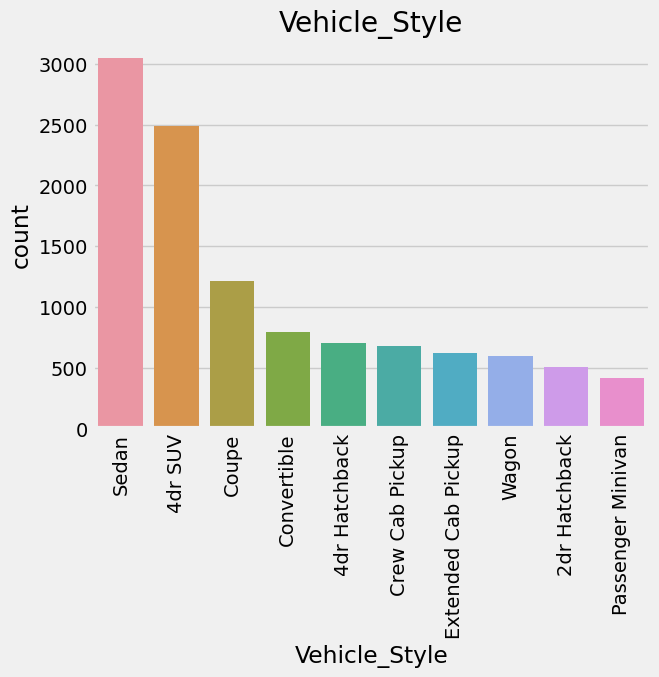

In [14]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Vehicle_Style', data = cars, order = cars.Vehicle_Style.value_counts().iloc[:10].index).set_title('Vehicle_Style')
plt.xticks(rotation='vertical')

#### Visualising numerical data

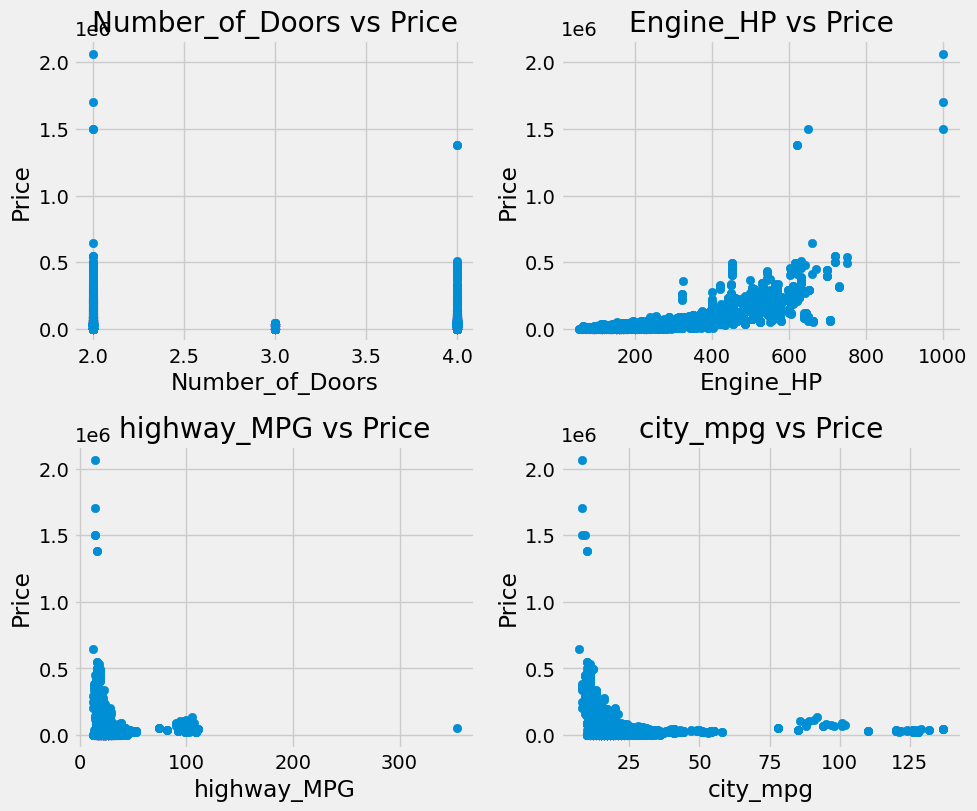

In [15]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['MSRP'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Number_of_Doors', 1)
scatter('Engine_HP', 2)
scatter('highway_MPG', 3)
scatter('city_mpg', 4)

plt.tight_layout()

#### Inference :

1. `Engine_HP`seems to have a poitive correlation with `price`. 
2. `Number_of_Doors` doesn't show any significant trend with price.

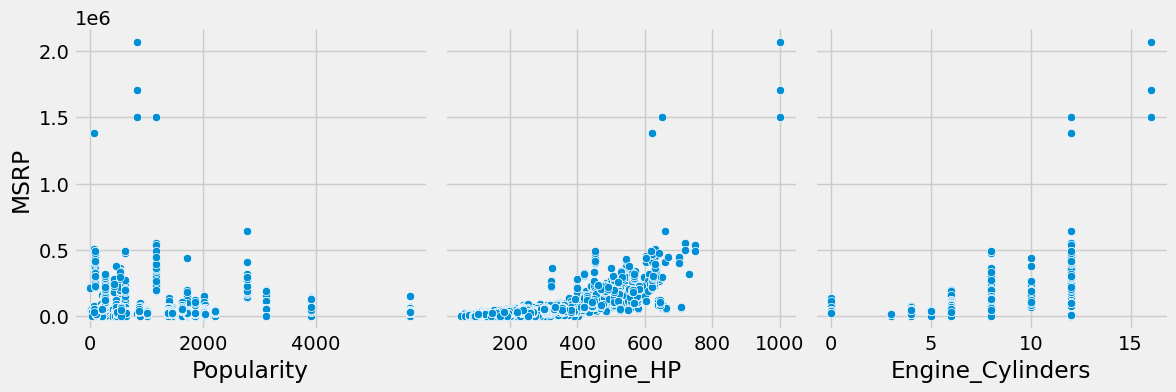

In [16]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='MSRP',size=4, aspect=1, kind='scatter')
    plt.show()

pp('Popularity', 'Engine_HP', 'Engine_Cylinders')

#### Inference :

1. `Engine_HP` - seem to have a significant positive correlation with price.

In [17]:
cars.Transmission_Type.unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

### Step 5 : Bivariate Analysis

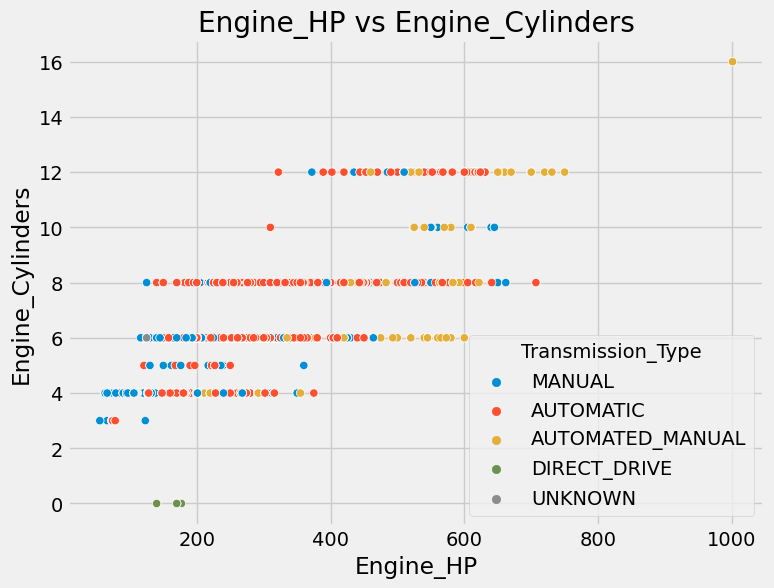

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(8,6))

plt.title('Engine_HP vs Engine_Cylinders')
sns.scatterplot(x=cars['Engine_HP'],y=cars['Engine_Cylinders'],hue=cars['Transmission_Type'])
plt.xlabel('Engine_HP')
plt.ylabel('Engine_Cylinders')

plt.show()
plt.tight_layout()

#### Inference :

1. `Engine_Cylinders` has an obvios `negative correlation` with price and is significant.

In [19]:
cars_lr = cars
cars_lr.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market Category,Vehicle Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


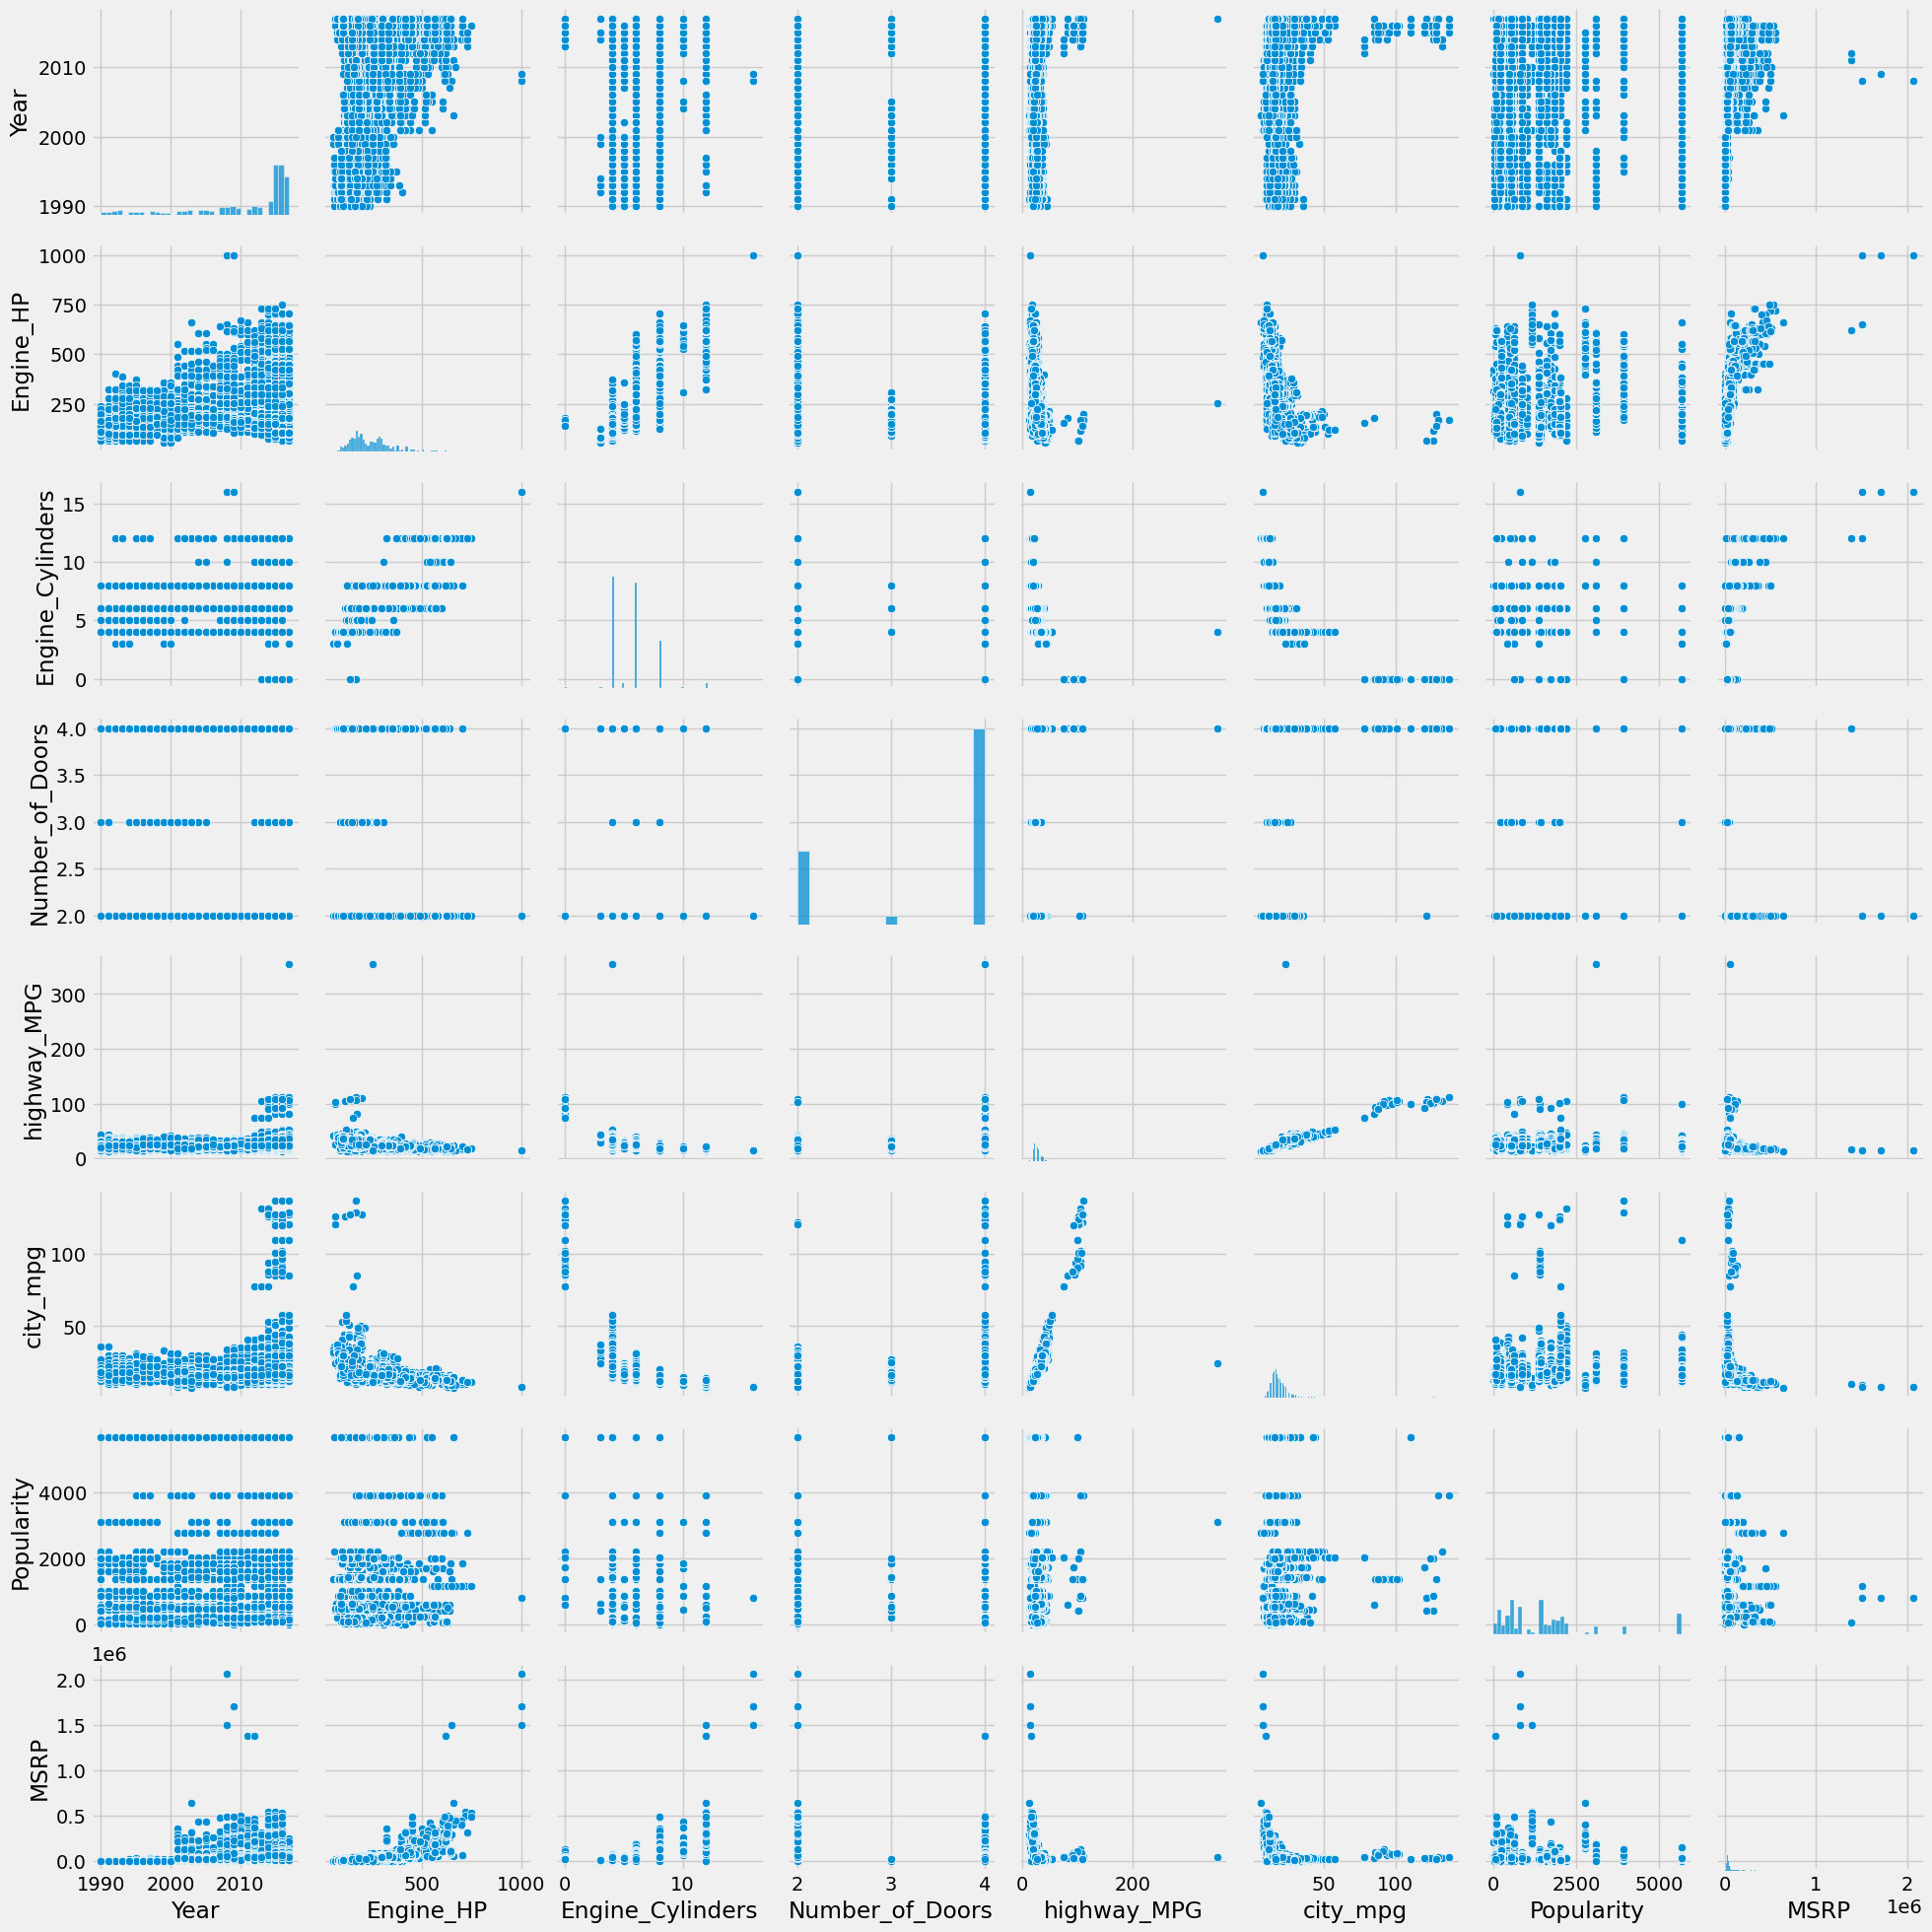

In [20]:
sns.pairplot(cars_lr)
plt.show()

### Step 6 : Dummy Variables

In [21]:
cars_lr.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market Category', 'Vehicle Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [22]:
cars_lr = pd.get_dummies(cars_lr)

In [23]:
cars_lr.head()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,...,Vehicle_Style_Convertible,Vehicle_Style_Convertible SUV,Vehicle_Style_Coupe,Vehicle_Style_Crew Cab Pickup,Vehicle_Style_Extended Cab Pickup,Vehicle_Style_Passenger Minivan,Vehicle_Style_Passenger Van,Vehicle_Style_Regular Cab Pickup,Vehicle_Style_Sedan,Vehicle_Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
cars_lr.shape

(11914, 1080)

In [25]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Columns: 1080 entries, Year to Vehicle_Style_Wagon
dtypes: float64(3), int64(5), uint8(1072)
memory usage: 12.9 MB


In [26]:
cars_lr.dropna()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,...,Vehicle_Style_Convertible,Vehicle_Style_Convertible SUV,Vehicle_Style_Coupe,Vehicle_Style_Crew Cab Pickup,Vehicle_Style_Extended Cab Pickup,Vehicle_Style_Passenger Minivan,Vehicle_Style_Passenger Van,Vehicle_Style_Regular Cab Pickup,Vehicle_Style_Sedan,Vehicle_Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,1,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23,16,204,56670,1,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23,16,204,50620,1,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23,16,204,50920,1,0,...,0,0,0,0,0,0,0,0,0,0


### Step 7 : Train-Test Split and feature scaling

In [32]:
x = cars_lr.drop(['MSRP'],axis = 1)
y = cars_lr['MSRP']
x.dropna()
y.dropna()

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11914, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

## Logistic Regression

In [34]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Columns: 1080 entries, Year to Vehicle_Style_Wagon
dtypes: float64(3), int64(5), uint8(1072)
memory usage: 12.9 MB


In [35]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').